### Importing the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data collection and Processing

In [2]:
# loading the data from csv file to pandas dataframe

car_dataset = pd.read_csv('car data.csv')

In [3]:
# inspecting the first 5 rows of the dataframe

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the number of rows and columns

car_dataset.shape

(301, 9)

In [5]:
# getting some information about the dataset

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking the number of missing values

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distribution of categorical data

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encoding the categorical data

In [8]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel':1, 'CNG': 2}}, inplace= True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace= True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace= True)

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the features and labels

In [10]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']

In [11]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [12]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### Splitting the data into training and test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

### Model Training

### 1. Linear Regression

In [14]:
# loading the linear regresion model

lin_model = LinearRegression()

In [15]:
lin_model.fit(X_train, Y_train)

LinearRegression()

### Evaluating Model

In [16]:
# prediction on training data

prediction_train = lin_model.predict(X_train)

In [20]:
# R-squared value

rsq_train = metrics.r2_score(Y_train, prediction_train)
print('R-squared value: ', rsq_train)

R-squared value:  0.8799451660493698


### Visualize the actual prices and predicted prices

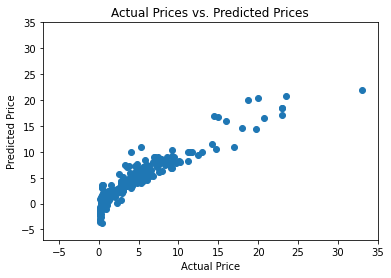

In [21]:
plt.scatter(Y_train, prediction_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Prices')
plt.xlim([-7, 35])
plt.ylim([-7, 35])
plt.show()

In [22]:
# prediction on test data

prediction_test = lin_model.predict(X_test)

In [23]:
# R-squared value

rsq_test = metrics.r2_score(Y_test, prediction_test)
print('R-squared value: ', rsq_test)

R-squared value:  0.8365766715026905


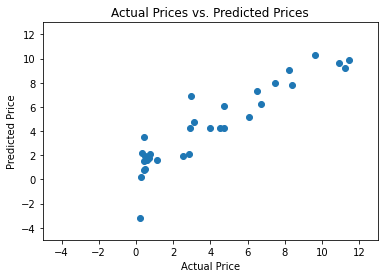

In [24]:
plt.scatter(Y_test, prediction_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Prices')
plt.xlim([-5, 13])
plt.ylim([-5, 13])
plt.show()

### 2. Lasso Regression

In [25]:
# loading the lasso regression model

lass_model = Lasso()

In [26]:
lass_model.fit(X_train, Y_train)

Lasso()

### Evaluating model

In [27]:
# prediction on training data

pred_train = lass_model.predict(X_train)

In [28]:
# R-squared value

r_train = metrics.r2_score(Y_train, pred_train)
print('R-squared value: ', r_train)

R-squared value:  0.8427856123435794


### Visualize the actual prices and predicted prices

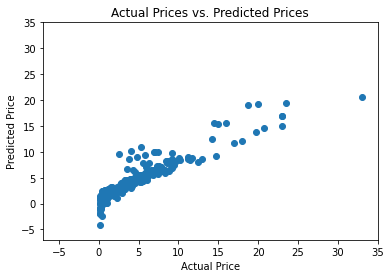

In [29]:
plt.scatter(Y_train, pred_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Prices')
plt.xlim([-7, 35])
plt.ylim([-7, 35])
plt.show()

In [30]:
# prediction on test data

pred_test = lass_model.predict(X_test)

In [31]:
# R-squared value

r_test = metrics.r2_score(Y_test, pred_test)
print('R-squared value: ', r_test)

R-squared value:  0.8709167941173195


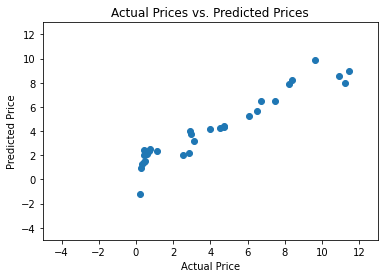

In [32]:
plt.scatter(Y_test, pred_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Prices')
plt.xlim([-5, 13])
plt.ylim([-5, 13])
plt.show()

### Saving the model

Save Model

In [33]:
with open('car_price.pkl', 'wb') as f:
    pickle.dump(lass_model, f)

Load Model

In [34]:
with open('car_price.pkl', 'rb') as f:
    loaded_lass_model = pickle.load(f)